<a href="https://colab.research.google.com/github/punitarani/MAT-494/blob/master/2.4%20Maximum%20Likelihood%20Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4 Maximum Likelihood Estimation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
plt.style.use("seaborn-notebook")

## Load Diabetes Dataset

In [3]:
# Diabetes Dataset Data and Target
dbdf, db_target = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)

# All the columns are float64 by default
# Make the following columns int32
dbdf = dbdf.astype({"age": int, "sex": int, "bp": int})

# Print DataFrame Shape
print("DataFrame Size: ", dbdf.shape)

# Print Columns and DataTypes
print("\nColumns and Data Types:")
print(dbdf.dtypes)

DataFrame Size:  (442, 10)

Columns and Data Types:
age      int32
sex      int32
bmi    float64
bp       int32
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object


In [4]:
print(pd.concat([dbdf, db_target], axis=1).head(5))

   age  sex   bmi   bp     s1     s2    s3   s4      s5    s6  target
0   59    2  32.1  101  157.0   93.2  38.0  4.0  4.8598  87.0   151.0
1   48    1  21.6   87  183.0  103.2  70.0  3.0  3.8918  69.0    75.0
2   72    2  30.5   93  156.0   93.6  41.0  4.0  4.6728  85.0   141.0
3   24    1  25.3   84  198.0  131.4  40.0  5.0  4.8903  89.0   206.0
4   50    1  23.0  101  192.0  125.4  52.0  4.0  4.2905  80.0   135.0


### Calculate Mean and Variance

In [5]:
dbdf_mean = dbdf.mean()
dbdf_var = dbdf.var()

print(pd.concat([dbdf_mean.rename("mean"), dbdf_var.rename("std")], axis=1))

           mean          std
age   48.518100   171.846610
sex    1.468326     0.249561
bmi   26.375792    19.519798
bp    94.601810   191.355824
s1   189.140271  1197.717241
s2   115.439140   924.955494
s3    49.788462   167.293585
s4     4.070249     1.665261
s5     4.641411     0.272892
s6    91.260181   132.165712


## Plot Diabetes Dataset

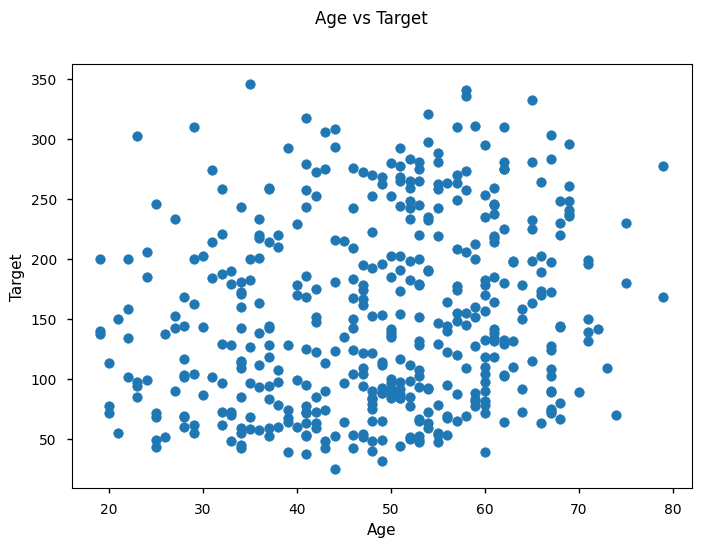

In [6]:
age_fig = plt.figure()
plt.scatter(dbdf["age"], db_target.values)
age_fig.suptitle("Age vs Target")
plt.xlabel("Age")
plt.ylabel("Target")
plt.show()

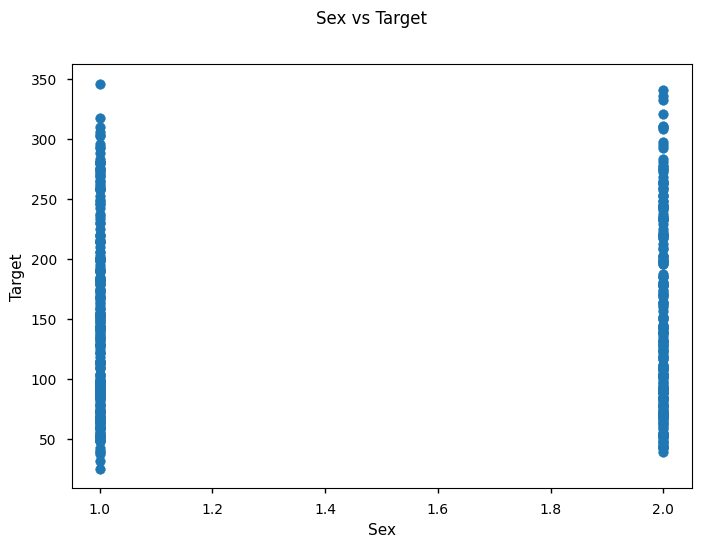

In [7]:
sex_fig = plt.figure()
plt.scatter(dbdf["sex"], db_target.values)
sex_fig.suptitle("Sex vs Target")
plt.xlabel("Sex")
plt.ylabel("Target")
plt.show()

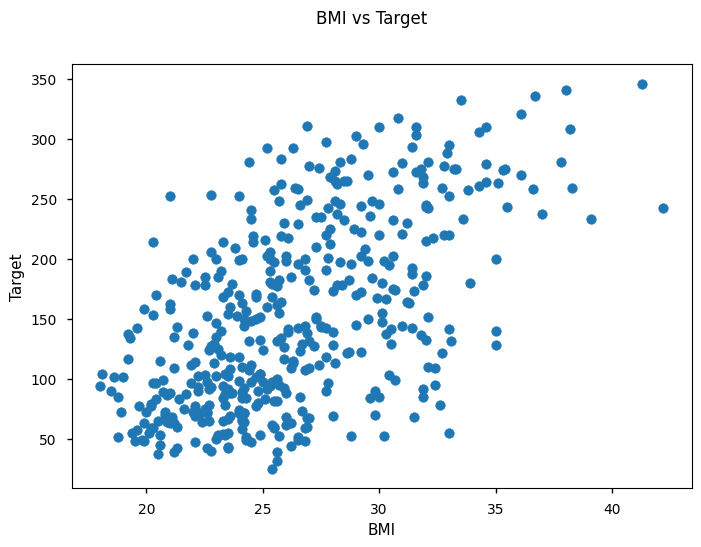

In [8]:
bmi_fig = plt.figure()
plt.scatter(dbdf["bmi"], db_target.values)
bmi_fig.suptitle("BMI vs Target")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.show()

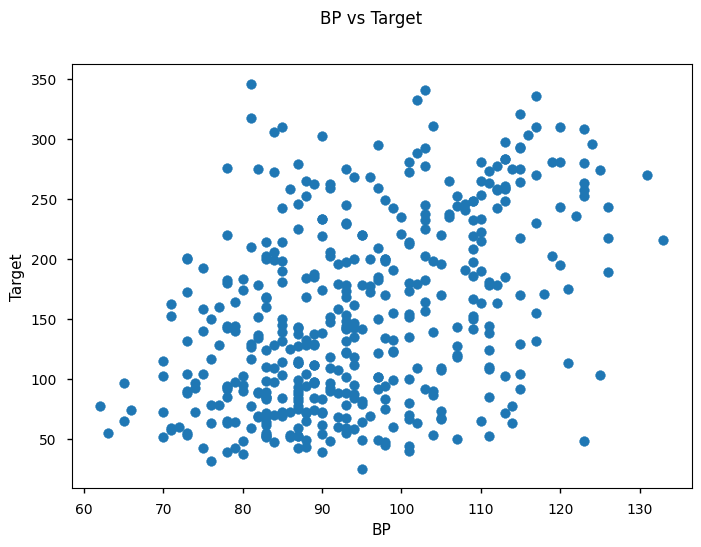

In [9]:
bp_fig = plt.figure()
plt.scatter(dbdf["bp"], db_target.values)
bp_fig.suptitle("BP vs Target")
plt.xlabel("BP")
plt.ylabel("Target")
plt.show()

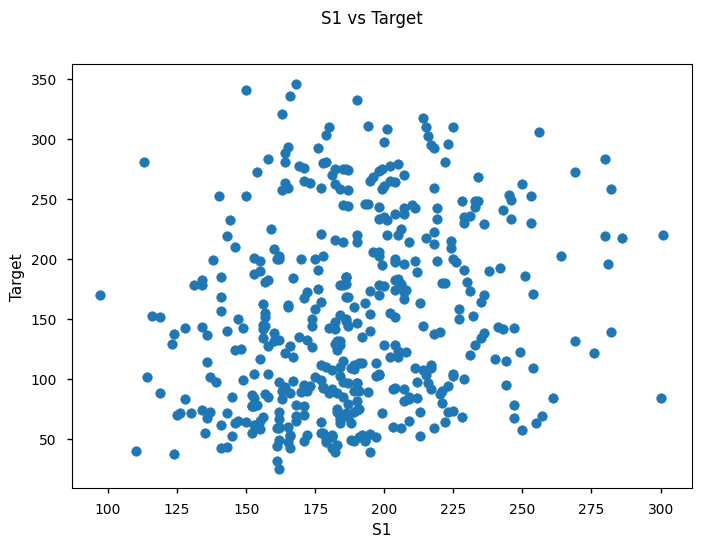

In [10]:
s1_fig = plt.figure()
plt.scatter(dbdf["s1"], db_target.values)
s1_fig.suptitle("S1 vs Target")
plt.xlabel("S1")
plt.ylabel("Target")
plt.show()

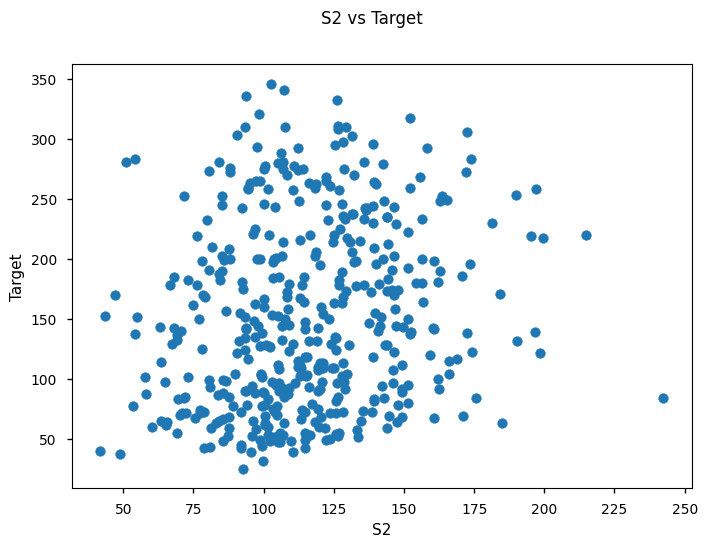

In [11]:
s2_fig = plt.figure()
plt.scatter(dbdf["s2"], db_target.values)
s2_fig.suptitle("S2 vs Target")
plt.xlabel("S2")
plt.ylabel("Target")
plt.show()

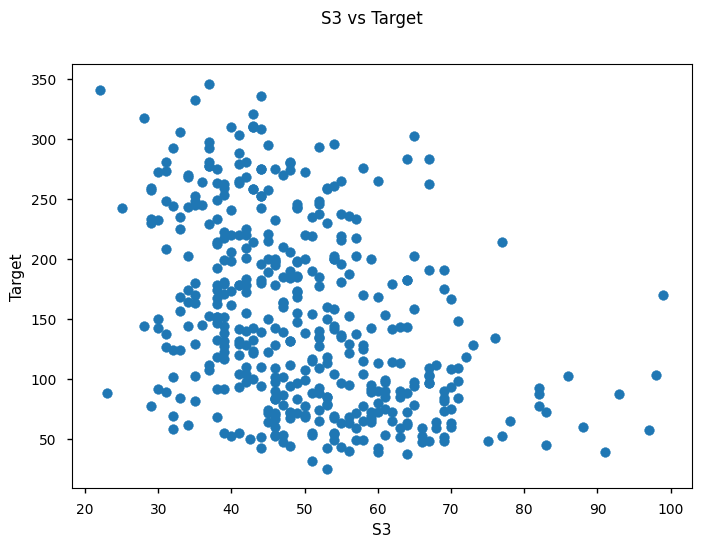

In [12]:
s3_fig = plt.figure()
plt.scatter(dbdf["s3"], db_target.values)
s3_fig.suptitle("S3 vs Target")
plt.xlabel("S3")
plt.ylabel("Target")
plt.show()

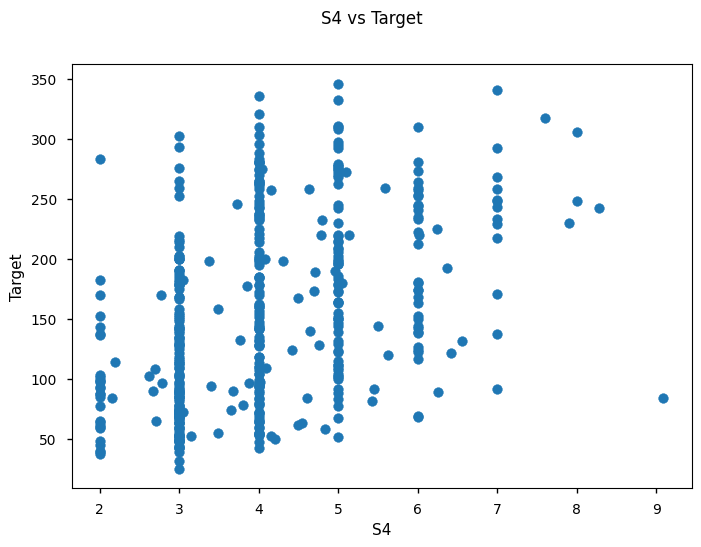

In [13]:
s4_fig = plt.figure()
plt.scatter(dbdf["s4"], db_target.values)
s4_fig.suptitle("S4 vs Target")
plt.xlabel("S4")
plt.ylabel("Target")
plt.show()

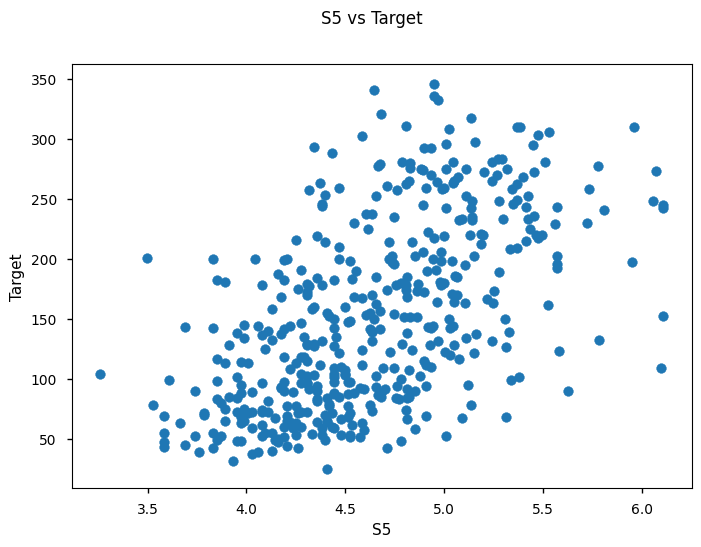

In [14]:
s5_fig = plt.figure()
plt.scatter(dbdf["s5"], db_target.values)
s5_fig.suptitle("S5 vs Target")
plt.xlabel("S5")
plt.ylabel("Target")
plt.show()

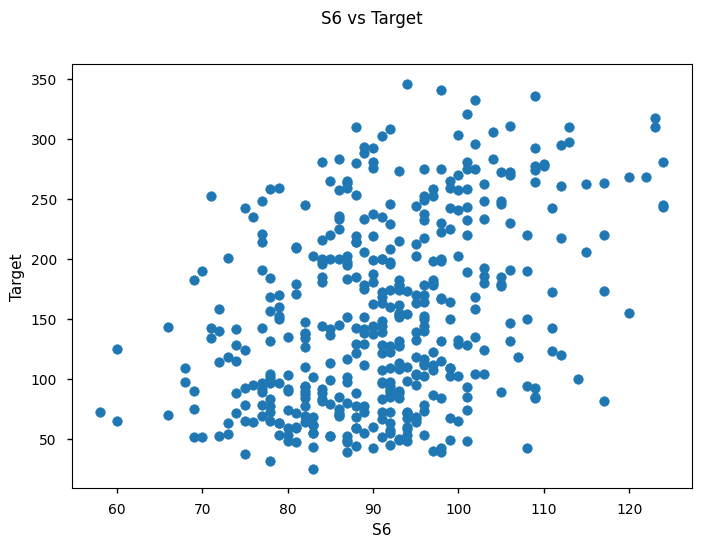

In [15]:
s6_fig = plt.figure()
plt.scatter(dbdf["s6"], db_target.values)
s6_fig.suptitle("S6 vs Target")
plt.xlabel("S6")
plt.ylabel("Target")
plt.show()

## MLE for Random Samples

Maximize a likelihood function to solve the probability distribution and parameters to best explain the data

$ \hat \mu = \bar X $,

$ \hat \sigma ^2 = \frac{\Sigma (X_i - \bar X) ^2}{n} $